In [145]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


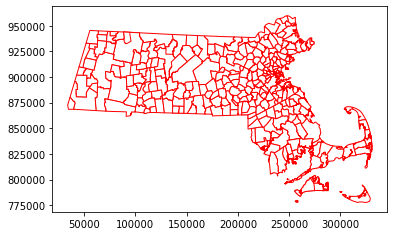

In [133]:
district_data = gpd.read_file('./schooldistricts/SCHOOLDISTRICTS_POLY.shp')
district_data.plot(facecolor='white', edgecolor='red')
plt.show()

In [134]:
district_data.columns
district_data = district_data.rename(columns={'ORG8CODE':'District Code'})


In [135]:
course_taking = pd.read_excel('./artcourse.xlsx')
course_taking.columns = course_taking.iloc[0]

course_taking = course_taking[1:]

print(len(course_taking))

course_taking['District Code'] = course_taking['District Code'].fillna(0)
district_data['District Code'] = district_data['District Code'].fillna(0)

#course_taking.head()

#course_taking.head()

# Create a new column with the first four characters in both DataFrames
course_taking['District Code Prefix'] = course_taking['District Code'].str[:4]
district_data['District Code Prefix'] = district_data['District Code'].str[:4]

# Perform the join based on the new column
merged_dataset = pd.merge(course_taking, district_data, on='District Code Prefix')


399


In [136]:
merged_dataset.columns

Index(['District Name', 'District Code_x', 'K', '01', '02', '03', '04', '05',
       '06', '07', '08', '09', '10', '11', '12', 'All Grades',
       'Total Students', 'District Code Prefix', 'ORG4CODE', 'District Code_y',
       'DISTRICT_N', 'DISTRICT_T', 'MEMBERLIST', 'TUITION', 'TUITION_GR',
       'TUITION_TO', 'SUPERINTEN', 'START_GRAD', 'END_GRADE', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry'],
      dtype='object')

In [144]:
wealth_dis_date = merged_dataset[['District Name', 'District Code_x','All Grades', 'Total Students', 'SHAPE_AREA','SHAPE_LEN','geometry']]
wealth_dis_date['All Grades'] = wealth_dis_date['All Grades'].str.replace(',', '').str.strip().astype(int)
wealth_dis_date['Total Students'] = wealth_dis_date['Total Students'].str.replace(',', '').str.strip().astype(int)

wealth_dis_date['percentage'] = wealth_dis_date['All Grades'] / wealth_dis_date['Total Students']


wealth_dis_date

/var/folders/yw/b9nlzwns0h35ngrgtc6rc9xr0000gn/T/ipykernel_52961/549918073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_dis_date['All Grades'] = wealth_dis_date['All Grades'].str.replace(',', '').str.strip().astype(int)
/var/folders/yw/b9nlzwns0h35ngrgtc6rc9xr0000gn/T/ipykernel_52961/549918073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_dis_date['Total Students'] = wealth_dis_date['Total Students'].str.replace(',', '').str.strip().astype(int)
/var/folders/yw/b9nlzwns0h35ngrgtc6r

,District Name,District Code_x,All Grades,Total Students,SHAPE_AREA,SHAPE_LEN,geometry,percentage
0,Abington,00010000,473,2109,2.639085e+07,24139.413120,"POLYGON ((248314.472 872355.495, 245760.093 87...",0.224277
1,Acton-Boxborough,06000000,1107,5124,7.951612e+07,42892.696690,"POLYGON ((208385.023 919537.035, 208912.212 91...",0.216042
2,Acushnet,00030000,880,880,4.889642e+07,31099.571632,"POLYGON ((249346.102 834852.795, 249415.703 83...",1.000000
3,Agawam,00050000,1274,3367,6.302191e+07,38060.713034,"POLYGON ((102185.312 873555.665, 102188.042 87...",0.378378
4,Amesbury,00070000,1172,1763,3.554717e+07,26560.146969,"POLYGON ((247820.583 959722.205, 248181.983 95...",0.664776
...,...,...,...,...,...,...,...,...
284,Winthrop,03460000,928,1887,5.888644e+06,25608.907642,"MULTIPOLYGON (((243028.083 901862.875, 243032....",0.491786
285,Woburn,03470000,1184,4206,3.352227e+07,27522.346202,"POLYGON ((231254.453 916708.735, 231092.623 91...",0.281503
286,Worcester,03480000,2131,23159,9.956271e+07,42619.276768,"POLYGON ((177883.312 895676.495, 178680.013 89...",0.092016
287,Worthington,03490000,0,55,8.314652e+07,45078.989129,"POLYGON ((86385.403 910085.065, 84425.282 9098...",0.000000


In [179]:
plot_shown = gpd.pd()

TypeError: 'module' object is not callable